In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn import metrics 
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv('cleaned_stroke.csv')

In [3]:
# train-test split
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)

In [4]:
# Categorical variable encoding
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns
transform_features = ["avg_glucose_level", "bmi"]

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
    ('scaler', StandardScaler(with_mean=False))
]
)

transform_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features),
    ('power_transformer', transform_pipe, transform_features)
])


In [5]:
X = preprocessor.fit_transform(X)

## Target variable

Stroke: 249, No Stroke: 4861


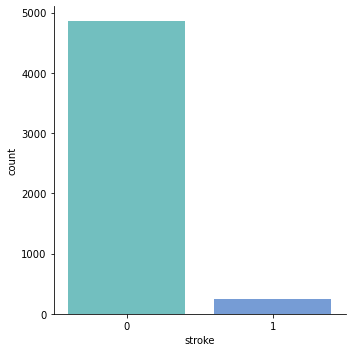

In [6]:
pos = df[df.stroke==1].shape[0]
neg = df[df.stroke==0].shape[0]
print("Stroke: " + str(pos) + ", No Stroke: " + str(neg))
sns.catplot(data=df, x="stroke", kind="count", palette="winter_r", alpha=.6)
plt.show()

## Handling Imbalanced Dataset
### Handling Imbalanced Target Variable.
- Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model.

- SMOTE is one of the famous oversampling techniques and is very effective in handling class imbalance. The idea is to combine - SMOTE with some undersampling techniques (ENN, Tomek) to increase the effectiveness of handling the imbalanced class.

In [7]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [8]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6736, 23), (1684, 23))

## Model Selection
- Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning

In [9]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [10]:
def cl(true, predict):
    acc = accuracy_score(true, predicted)
    return acc

In [11]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred) 


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1)) 
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)


    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9703
- F1 score: 0.9729
- Precision: 0.9574
- Recall: 0.9890
- Roc Auc Score: 0.9687


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9210
- F1 score: 0.9274
- Precision: 0.9208
- Recall: 0.9340
- Roc Auc Score: 0.9199


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9314
- F1 score: 0.9366
- Precision: 0.9148
- Recall: 0.9595
- Roc Auc Score: 0.9297
----------------------------------
Model performance for Test set
- Accuracy: 0.9151
- F1 score: 0.9227
- Precision: 0.9074
- Recall: 0.9384
- Roc Auc Score: 0.9131


Logistic Regression
Model performance for Training 

In [12]:
Results = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results.sort_values(by=["Accuracy_score"],ascending=False)

,Model Name,Accuracy_score
0,Random Forest,0.970309
5,XGBClassifier,0.966152
4,K-Neighbors Classifier,0.965558
6,CatBoosting Classifier,0.959620
7,Support Vector Classifier,0.923990
1,Decision Tree,0.921021
2,Gradient Boosting,0.915083
8,AdaBoost Classifier,0.872922
3,Logistic Regression,0.842043


In [13]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [5, 8, 12, 20, 30]}

In [14]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsClassifier(), knn_params),
                   ("RF", RandomForestClassifier(), rf_params),
                   ('XGBoost', XGBClassifier(), xgboost_params),
                   ('CatBoost', CatBoostClassifier(verbose=False), cat_params)
                   ]

In [15]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
---------------- Best Params for CatBoost -------------------
{'max_depth': 12, 'learning_rate': 0.1}


In [16]:
models = {
    "Random Forest": RandomForestClassifier(**model_param['RF']),
    "K-Neighbors Classifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost']), 
    "CatBoosting Classifier": CatBoostClassifier(**model_param['CatBoost'], verbose=False),
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred) 


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9721
- F1 score: 0.9746
- Precision: 0.9566
- Recall: 0.9934
- Roc Auc Score: 0.9702


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 1.0000
- Recall: 0.9986
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.9952
- F1 score: 0.9956
- Precision: 0.9923
- Recall: 0.9989
- Roc Auc Score: 0.9949


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9709
- F1 score: 0.9732
- Precision: 0.9664
- Recall: 0.9802
- Roc Auc Score: 0.9701


CatBoosting Classifier
Model performance for T

In [17]:
Results_retrain = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results_retrain.sort_values(by=["Accuracy_score"],ascending=False)

,Model Name,Accuracy_score
1,K-Neighbors Classifier,0.995249
3,CatBoosting Classifier,0.985154
0,Random Forest,0.972090
2,XGBClassifier,0.970903


In [18]:
from sklearn.model_selection import cross_val_score,StratifiedKFold


models = {
    "Random Forest": RandomForestClassifier(**model_param['RF']),
    "K-Neighbors Classifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost']), 
    "CatBoosting Classifier": CatBoostClassifier(**model_param['CatBoost'], verbose=False),
}

skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    cv_results = cross_val_score(model, X_res, y_res, cv=skfold,scoring="accuracy",n_jobs=-1)
    
    cross_validation_score = cv_result  s.mean()*100
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("- cross_validation_score: {:.4f}".format(cross_validation_score))

Random Forest
- cross_validation_score: 97.7672
K-Neighbors Classifier
- cross_validation_score: 99.5606
XGBClassifier
- cross_validation_score: 97.8979
CatBoosting Classifier
- cross_validation_score: 98.3848


### KNN can be used in the Pipeline